# <center>Laboratorium 9<br>Metody Numeryczne</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.

***Materiały przygotowujące:***


In [18]:
import main
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
import math

***Temat główny:***

Znajdź miejsca zerowe funkcji: 
$$ 
f(x) = e^{-2x} + x^2 - 1 
$$,

metodami:
* Bisekcji,
* Newtona

Funkcja i jej pochodne zostały zaimplementowane w *main.py*

***Zadanie 1.***  
Wykonaj wykres funkcji oraz jej pierwszej i drugiej pochodnej (obliczonej analitycznie) na jednym rysunku w przedziale pozwalającym na zgrubne określenie miejsc zerowych. Wykres powinien być odpowiednio opisany. Określ przedziały, w którym znajdują się miejsca zerowe naszej funkcji.

W jaki sposób (wykorzystując pierwszą i drugą pochodną) można znaleźć miejsca zerowe funkcji?

(-1.0, 3.0)

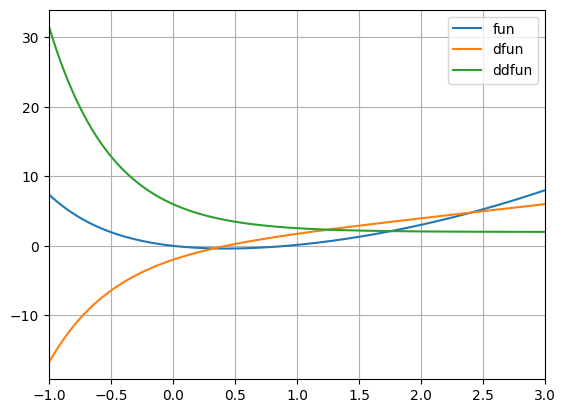

In [19]:
from main import fun, dfun, ddfun
x = np.linspace(-1, 3, 4000)
y = fun(x)
ydot = dfun(x)
ydotdot = ddfun(x)
plt.plot(x, y, label='fun')
plt.plot(x, ydot, label='dfun')
plt.plot(x, ydotdot, label='ddfun')
plt.legend()
plt.grid()
plt.xlim(-1, 3)


Używając pierwszej i drugiej pochodnej nie można znaleźć miejsc zerowych funkcji, jednak obliczenie punktów dla których pochodne się zerują wskazuje, gdzie mogą znajdować się miejsce zerowe (w okolicy tych punktów). Gdy mamy do dyspozycji także funkcję do obliczenia pierwiastków można użyć m.in. metody Newtona.

***Zadanie 2.***  
Najprostszą metodą do wyznaczenia miejsca zerowego funkcji nieliniowej jest metoda bisekcji. Zaimplementuj [metodę bisekcji](https://en.wikipedia.org/wiki/Bisection_method)

Pamiętaj, że gwarancją zbieżności działania funkcji są założenia:

1) funkcja jest ciągła na danym przedziale $[a,b]$

2) wartość funkcji na końcach przedziału przyjmuje przeciwne znaki (tzn. $f(a)*f(b)<0$)

***Zadanie 3.***  
Inną metodą, wykorzystywaną do poszukiwania miejsca zerowego funkcji jest metoda Newtona. Wykorzystuję ona wartość pierwszej pochodnej do wyznaczenia wartości.

1) zaimplementuj iloraz różnicowy. 
2) wygeneruj wektor 10 elementowy
3) sprawdź działanie funkcji dla danego wektora oraz  $h=0.00001$ oraz z wartościami uzyskanymi z funkcją wyliczoną analityczną.

Zaimplementuj [metodę Newtona](https://en.wikipedia.org/wiki/Newton%27s_method)

Gwarancja zbieżności:

1) funkcja jest ciągła na danym przedziale $[a,b]$

2) Pierwsza i druga pochodna istnieją i są ciągłe w przedziale domkniętym $[a,b]$

3) funkcja na końcach przedziału przyjmuje przeciwne znaki

4) pierwsza i druga pochodna mają stały znak (brak ekstremów lokalnych i punktów przegięcia)


In [20]:
from main import difference_quotient
x3 = np.linspace(-5, 4, 10)
y3 = []
for i in x3:
    y3.append(difference_quotient(fun, i, 0.00001))
print(y3)

y32 = dfun(x3)
print(y32)


[-44062.49105159077, -5969.85634538214, -812.8495084633868, -113.1951981108159, -16.77795441761276, -1.9999700001327445, 1.729342140222023, 3.9633790885673643, 5.99505254523791, 7.999339080910771]
[-4.40629316e+04 -5.96991597e+03 -8.12857587e+02 -1.13196300e+02
 -1.67781122e+01 -2.00000000e+00  1.72932943e+00  3.96336872e+00
  5.99504250e+00  7.99932907e+00]


Jak widać zaimplementowana funkcja tworząca iloraz różnicowy podaje wyniki bardzo zbliżone do właściwych

***Zadania 4.***  
Dla głównej funkcji z zadania 1 znajdź miejsca zerowe przy użyciu:

* funkcji root dostępnej w pakiecie scipy.optimize
* funkcji fsolve dostępnej w pakiecie scipy.optimize


In [21]:
rut = scipy.optimize.root(fun, [-1, 3])
print("Metoda root: ", rut, '\n')
fs = scipy.optimize.fsolve(fun, [-1, 3])
print("Metoda fsolve: ", fs, '\n')

Metoda root:   message: The solution converged.
 success: True
  status: 1
     fun: [-1.998e-15  2.887e-15]
       x: [ 1.022e-15  9.166e-01]
    nfev: 19
    fjac: [[-1.000e+00 -1.334e-03]
           [ 1.334e-03 -1.000e+00]]
       r: [ 1.998e+00 -1.992e-03 -1.513e+00]
     qtf: [-2.272e-12  2.441e-12] 

Metoda fsolve:  [1.02154807e-15 9.16562583e-01] 



***Zadanie 5.***  
Dla głównej funkcji oraz przedziału zdefiniowanego z zadania 1 znajdź miejsca zerowe przy użyciu:

* metody bisekcji
* metody Newtona

z tolerancją $10^{-10}$

Zbadaj dokładność(względem rozwiązania z zadania 4) i czas obliczeń metod w zależności od liczby iteracji. Wyniki przedstaw na wykresach. 

In [22]:
from main import bisection, newton
b1x, b1n = bisection(-1, 0.3, fun, 1e-10, 100)
print("Metoda bisekcji: ")
print("Pierwiastek 1: ", b1x)
print("Liczba iteracji 1: ", b1n, '\n')
b2x, b2n = bisection(0.5, 3, fun, 1e-10, 100)
print("Pierwiastek 2: ", b2x)
print("Liczba iteracji 2: ", b2n, '\n')

n1x, n1n = newton(fun, dfun, ddfun, -1, 0.3, 1e-10, 100)
print("Metoda newtona: ")
print("Pierwiastek 1: ", n1x)
print("Liczba iteracji 1: ", n1n, '\n')
n2x, n2n = newton(fun, dfun, ddfun, 0.5, 3, 1e-10, 100)
print("Pierwiastek 2: ", n2x)
print("Liczba iteracji 2: ", n2n, '\n')

Metoda bisekcji: 
Pierwiastek 1:  2.3283070770519798e-11
Liczba iteracji 1:  31 

Pierwiastek 2:  0.9165625831228681
Liczba iteracji 2:  32 

Metoda newtona: 
Pierwiastek 1:  -5.753992934998626e-18
Liczba iteracji 1:  7 

Pierwiastek 2:  0.9165625831057262
Liczba iteracji 2:  6 



Bisekcja - błąd bezwzględny dla pierwiastka 1:  2.3282049222451042e-11
Bisekcja - błąd bezwzględny dla pierwiastka 2:  1.716804476359357e-11
Metoda Newtona - błąd bezwzględny dla pierwiastka 1:  1.027302061692851e-15
Metoda Newtona - błąd bezwzględny dla pierwiastka 2:  2.6201263381153694e-14


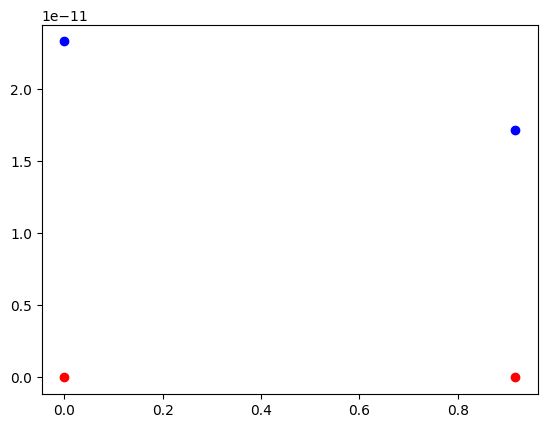

In [23]:
bb1 = np.abs(b1x - fs[0])
print("Bisekcja - błąd bezwzględny dla pierwiastka 1: ", bb1)
bb2 = np.abs(b2x - fs[1])
print("Bisekcja - błąd bezwzględny dla pierwiastka 2: ", bb2)
bb = [bb1, bb2]
bn1 = np.abs(n1x - fs[0])
print("Metoda Newtona - błąd bezwzględny dla pierwiastka 1: ", bn1)
bn2 = np.abs(n2x - fs[1])
print("Metoda Newtona - błąd bezwzględny dla pierwiastka 2: ", bn2)
bn = [bn1, bn2]
plt.plot(fs, bb, 'bo')
plt.plot(fs, bn, 'ro')

264 µs ± 52.8 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)
227 µs ± 14 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)
250 µs ± 48.6 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)
236 µs ± 10.3 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)
224 µs ± 6.06 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)
234 µs ± 31.8 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)
230 µs ± 10.8 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)
217 µs ± 6.58 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)
219 µs ± 6.2 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)
217 µs ± 5.44 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)
219 µs ± 8.46 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)
217 µs ± 5.46 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)
213 µs ± 2.32 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)
214 µs ± 3.55 µs per loop (mean ± std. dev. of 10 runs, 100 loops e

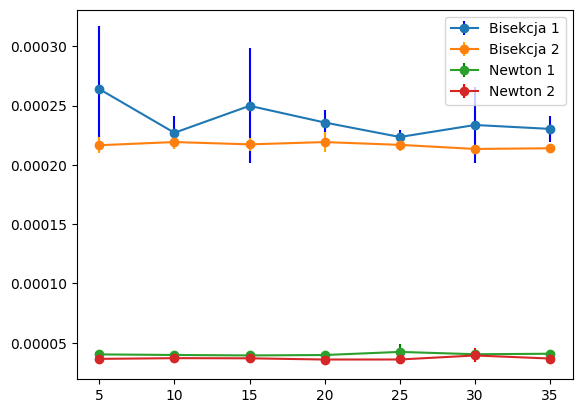

In [24]:
iter = [5, 10, 15, 20, 25, 30, 35]
czasb1 = []
errorb1 = []
czasb2 = []
errorb2 = []

for i in iter:
    time = %timeit -r 10 -n 100 -o bisection(-1, 0.5, fun, 1e-10, 100)
    czasb1.append(time.average)
    errorb1.append(time.stdev)
    
for i in iter:
    time = %timeit -r 10 -n 100 -o bisection(0.5, 3, fun, 1e-10, 100)
    czasb2.append(time.average)
    errorb2.append(time.stdev)
    
czasn1 = []
errorn1 = []
czasn2 = []
errorn2 = []

for i in iter:
    time = %timeit -r 10 -n 100 -o newton(fun, dfun, ddfun, -1, 0.3, 1e-10, 100)
    czasn1.append(time.average)
    errorn1.append(time.stdev)
    
for i in iter:
    time = %timeit -r 10 -n 100 -o newton(fun, dfun, ddfun, 0.5, 3, 1e-10, 100)
    czasn2.append(time.average)
    errorn2.append(time.stdev)
    
plt.errorbar(iter, czasb1, yerr=errorb1, marker='o', ecolor='b')
plt.errorbar(iter, czasb2, yerr=errorb2, marker='o', ecolor='orange')
plt.errorbar(iter, czasn1, yerr=errorn1, marker='o', ecolor='g')
plt.errorbar(iter, czasn2, yerr=errorn2, marker='o', ecolor='r')
plt.legend(['Bisekcja 1', 'Bisekcja 2', 'Newton 1', 'Newton 2'])

Wnioski:

Obliczanie miejsc zerowych metodą bisekcji oraz metodą Newtona zwraca właściwe wyniki z dość dużym, zadowalającym przybiżeniem. Obie metody muszą mieć specjalne warunki, aby można było je zastosować. Czasem konieczne jest podzielenie przedziałów na mniejsze części i w tych częściach szukanie miejsc zerowych, gdyż większe przedziały nie spełniają wszystkich założeń. Metoda bisekcji jest metodą prostszą w implementacji, posiada również mniejsze wymagania, jednak daje mniej dokładne wyniki, a obliczenia zajmują więcej czasu. Metoda Newtona jest trudniejsza w implementacji i posiada wymagania często trudne do spełnienia, jednak jest znacznie szybsza i dokładniejsza. 